In [449]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

In [450]:
df= pd.read_excel("airlineSatisfactionAtilla06.xlsx")

In [451]:
df.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
0,1,Male,48,Business travel,Business,821,2,5.0,3,4,...,5,5,3,3,5,5,5,5,4,5
1,2,Female,35,Business travel,Business,821,26,39.0,2,3,...,4,5,5,5,5,4,5,5,4,8
2,3,Male,41,Business travel,Business,853,0,0.0,5,5,...,5,5,3,4,3,5,3,5,4,9
3,4,Male,50,Personal Travel,Business,1905,0,0.0,1,3,...,5,5,5,5,5,4,5,5,3,9
4,5,Female,49,Business travel,Business,3470,0,1.0,3,4,...,4,5,3,5,3,4,3,5,4,8


In [452]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Gender,Male,Female,Male,Male,Female
Age,48,35,41,50,49
Type of Travel,Business travel,Business travel,Business travel,Personal Travel,Business travel
Class,Business,Business,Business,Business,Business
Flight Distance,821,821,853,1905,3470
Departure Delay in Minutes,2,26,0,0,0
Arrival Delay in Minutes,5.0,39.0,0.0,0.0,1.0
Inflight wifi service,3,2,5,1,3
Departure/Arrival time convenient,4,3,5,3,4


In [453]:
df.shape

(103904, 24)

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Departure Delay in Minutes         103904 non-null  int64  
 7   Arrival Delay in Minutes           103594 non-null  float64
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [455]:
df.columns

Index(['ID', 'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'NPS'],
      dtype='object')

In [456]:
df.index

RangeIndex(start=0, stop=103904, step=1)

In [457]:
df.isnull().values.any()

True

In [458]:
df.isnull().sum()

ID                                     0
Gender                                 0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
satisfaction                           0
NPS                                    0
dtype: int64

In [459]:
df_copy= df.copy()

In [460]:
df["Gender"].value_counts()

Female    52621
Male      51283
Name: Gender, dtype: int64

In [461]:
df["satisfaction"].value_counts()

3    64082
4    36900
5     2787
2      135
Name: satisfaction, dtype: int64

In [462]:
df["Food and drink"].value_counts()

4    46838
3    44486
2     9711
5     2769
1      100
Name: Food and drink, dtype: int64

In [463]:
df["Gender"].value_counts()/ len(df)*100 

Female    50.643864
Male      49.356136
Name: Gender, dtype: float64

In [464]:
dfFemale= df[df["Gender"]== "Female"]

In [465]:
dfFemale.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
1,2,Female,35,Business travel,Business,821,26,39.0,2,3,...,4,5,5,5,5,4,5,5,4,8
4,5,Female,49,Business travel,Business,3470,0,1.0,3,4,...,4,5,3,5,3,4,3,5,4,8
7,8,Female,60,Business travel,Business,853,0,3.0,5,4,...,4,4,3,5,3,4,3,5,4,9
9,10,Female,38,Personal Travel,Business,2822,13,0.0,2,3,...,4,5,5,5,5,4,5,5,4,9
10,11,Female,28,Business travel,Business,821,0,5.0,1,2,...,2,3,2,5,3,4,4,3,3,4


In [466]:
dfFemale.tail()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
103897,103898,Female,23,Business travel,Business,337,46,58.0,2,3,...,5,5,2,2,4,3,4,5,3,4
103898,103899,Female,44,Personal Travel,Eco Plus,308,0,22.0,3,5,...,4,4,3,4,3,4,3,5,3,8
103899,103900,Female,28,Personal Travel,Eco Plus,337,0,0.0,4,3,...,3,4,1,5,3,5,4,4,3,8
103900,103901,Female,55,Personal Travel,Eco Plus,308,0,0.0,3,5,...,3,5,4,4,4,5,4,5,4,9
103903,103904,Female,20,Personal Travel,Eco Plus,337,0,0.0,3,2,...,2,3,4,5,1,5,2,3,3,8


In [467]:
dfFemale.shape

(52621, 24)

In [468]:
dfFemale.isnull().values.any()

True

In [469]:
dfFemale.isnull().sum()

ID                                     0
Gender                                 0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             150
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
satisfaction                           0
NPS                                    0
dtype: int64

In [470]:
dfFemale.dtypes

ID                                     int64
Gender                                object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
satisfacti

In [471]:
dfFemale.columns

Index(['ID', 'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'NPS'],
      dtype='object')

In [472]:
target_columns = ['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

In [473]:
dfFemale.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
1,2,Female,35,Business travel,Business,821,26,39.0,2,3,...,4,5,5,5,5,4,5,5,4,8
4,5,Female,49,Business travel,Business,3470,0,1.0,3,4,...,4,5,3,5,3,4,3,5,4,8
7,8,Female,60,Business travel,Business,853,0,3.0,5,4,...,4,4,3,5,3,4,3,5,4,9
9,10,Female,38,Personal Travel,Business,2822,13,0.0,2,3,...,4,5,5,5,5,4,5,5,4,9
10,11,Female,28,Business travel,Business,821,0,5.0,1,2,...,2,3,2,5,3,4,4,3,3,4


In [474]:
for col in target_columns:
    dfFemale[col][dfFemale[col]==1] = 0
    dfFemale[col][dfFemale[col]==2] = 20
    dfFemale[col][dfFemale[col]==3] = 50
    dfFemale[col][dfFemale[col]==4] = 80
    dfFemale[col][dfFemale[col]==5] = 100

In [475]:
dfFemale.head().T

,1,4,7,9,10
ID,2,5,8,10,11
Gender,Female,Female,Female,Female,Female
Age,35,49,60,38,28
Type of Travel,Business travel,Business travel,Business travel,Personal Travel,Business travel
Class,Business,Business,Business,Business,Business
Flight Distance,821,3470,853,2822,821
Departure Delay in Minutes,26,0,0,13,0
Arrival Delay in Minutes,39.0,1.0,3.0,0.0,5.0
Inflight wifi service,20,50,100,20,0
Departure/Arrival time convenient,50,80,80,50,20


In [476]:
dfFemale[target_columns].head().T #çalışma yapacağımız kolonlar 

,1,4,7,9,10
Inflight wifi service,20,50,100,20,0
Departure/Arrival time convenient,50,80,80,50,20
Ease of Online booking,20,50,80,100,0
Gate location,50,80,100,50,80
Food and drink,80,80,80,80,50
Online boarding,100,100,100,100,20
Seat comfort,80,80,80,80,20
Inflight entertainment,100,100,80,100,50
On-board service,100,50,50,100,20
Leg room service,100,100,100,100,100


In [477]:
dfFemale["satisfaction"].value_counts()

50     32905
80     18537
100     1111
20        68
Name: satisfaction, dtype: int64

In [478]:
dfFemale["Food and drink"].value_counts()

80     23382
50     22792
20      5289
100     1104
0         54
Name: Food and drink, dtype: int64

In [479]:
dfFemale[target_columns].corr()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Inflight wifi service,1.000000,0.329408,0.683411,0.276768,0.529853,0.396856,0.087652,0.209040,0.153702,0.252302,0.151401,0.042216,0.142256,0.100564,0.729566
Departure/Arrival time convenient,0.329408,1.000000,0.451675,0.436105,0.283277,0.115533,0.036321,-0.011950,0.035229,-0.004568,0.033588,0.084371,0.029705,0.032781,0.331629
Ease of Online booking,0.683411,0.451675,1.000000,0.415077,0.385916,0.363308,0.022305,0.038149,0.037645,0.167225,0.035391,0.020142,0.032566,0.008579,0.543778
Gate location,0.276768,0.436105,0.415077,1.000000,0.162139,-0.024941,-0.018134,-0.015515,-0.055127,-0.025286,-0.010609,-0.051900,-0.013352,-0.026251,0.267255
Food and drink,0.529853,0.283277,0.385916,0.162139,1.000000,0.339428,0.311899,0.486230,0.521804,0.391823,0.517902,0.295919,0.645737,0.327754,0.729317
Online boarding,0.396856,0.115533,0.363308,-0.024941,0.339428,1.000000,0.396038,0.195045,0.110110,0.080653,0.038855,0.184764,0.033067,0.293702,0.382290
Seat comfort,0.087652,0.036321,0.022305,-0.018134,0.311899,0.396038,1.000000,0.480167,0.119146,0.092623,0.056081,0.201990,0.053067,0.618294,0.300377
Inflight entertainment,0.209040,-0.011950,0.038149,-0.015515,0.486230,0.195045,0.480167,1.000000,0.450748,0.293487,0.409828,0.093910,0.443385,0.566312,0.372625
On-board service,0.153702,0.035229,0.037645,-0.055127,0.521804,0.110110,0.119146,0.450748,1.000000,0.353403,0.573597,0.214755,0.620388,0.116733,0.339626
Leg room service,0.252302,-0.004568,0.167225,-0.025286,0.391823,0.080653,0.092623,0.293487,0.353403,1.000000,0.368248,0.137567,0.364183,0.089932,0.314581


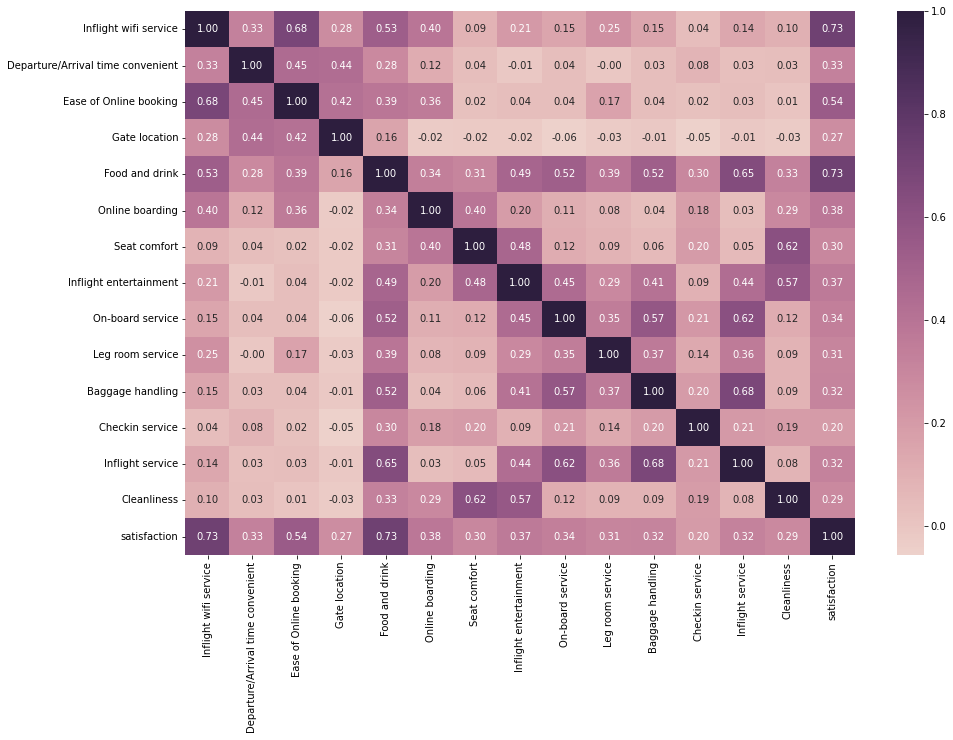

In [480]:
plt.figure(figsize=(15, 10))
sns.heatmap(dfFemale[target_columns].corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f")
plt.show()

In [481]:
df_corr= df[target_columns].corr()

In [482]:
df_corr.head().T

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink
Inflight wifi service,1.000000,0.330809,0.669500,0.297313,0.535132
Departure/Arrival time convenient,0.330809,1.000000,0.452169,0.446726,0.306604
Ease of Online booking,0.669500,0.452169,1.000000,0.435258,0.395493
Gate location,0.297313,0.446726,0.435258,1.000000,0.190556
Food and drink,0.535132,0.306604,0.395493,0.190556,1.000000
Online boarding,0.469253,0.070297,0.404198,-0.016263,0.388670
Seat comfort,0.127052,0.003545,0.030667,-0.009545,0.345197
Inflight entertainment,0.212643,-0.013332,0.041036,-0.004415,0.463673
On-board service,0.122899,0.066037,0.038025,-0.046159,0.486473
Leg room service,0.168207,0.007769,0.105081,-0.020201,0.360388


In [483]:
df_satisfaction= df_corr[["satisfaction"]]

In [484]:
df_satisfaction.head(10)

,satisfaction
Inflight wifi service,0.729150
Departure/Arrival time convenient,0.335723
Ease of Online booking,0.544778
Gate location,0.292025
Food and drink,0.745224
Online boarding,0.441524
Seat comfort,0.338414
Inflight entertainment,0.375654
On-board service,0.316511
Leg room service,0.276488


In [485]:
df_satisfaction.columns= ["Importance"]

In [486]:
df_satisfaction.head()

,Importance
Inflight wifi service,0.729150
Departure/Arrival time convenient,0.335723
Ease of Online booking,0.544778
Gate location,0.292025
Food and drink,0.745224


In [487]:
dfFemale[target_columns].mean()

Inflight wifi service                42.425458
Departure/Arrival time convenient    71.811254
Ease of Online booking               44.236522
Gate location                        71.534558
Food and drink                       61.312784
Online boarding                      78.281675
Seat comfort                         62.500903
Inflight entertainment               82.757454
On-board service                     59.802930
Leg room service                     77.559910
Baggage handling                     65.661808
Checkin service                      78.031014
Inflight service                     65.865529
Cleanliness                          77.002147
satisfaction                         61.585109
dtype: float64

In [488]:
dfFemale[target_columns].std() #service quality

Inflight wifi service                38.257996
Departure/Arrival time convenient    31.599111
Ease of Online booking               34.699462
Gate location                        29.164009
Food and drink                       20.430800
Online boarding                      27.802867
Seat comfort                         34.055726
Inflight entertainment               23.649093
On-board service                     33.994784
Leg room service                     27.679099
Baggage handling                     31.835308
Checkin service                      27.469029
Inflight service                     31.603331
Cleanliness                          28.127617
satisfaction                         15.387733
dtype: float64

In [489]:
pd.DataFrame({"Satisfaction" : dfFemale[target_columns].mean()})

,Satisfaction
Inflight wifi service,42.425458
Departure/Arrival time convenient,71.811254
Ease of Online booking,44.236522
Gate location,71.534558
Food and drink,61.312784
Online boarding,78.281675
Seat comfort,62.500903
Inflight entertainment,82.757454
On-board service,59.802930
Leg room service,77.559910


In [490]:
pd.DataFrame({"Service Quality": dfFemale[target_columns].std() })

,Service Quality
Inflight wifi service,38.257996
Departure/Arrival time convenient,31.599111
Ease of Online booking,34.699462
Gate location,29.164009
Food and drink,20.430800
Online boarding,27.802867
Seat comfort,34.055726
Inflight entertainment,23.649093
On-board service,33.994784
Leg room service,27.679099


In [491]:
pd.DataFrame({"Satisfaction" : dfFemale[target_columns].mean(), "Service Quality": dfFemale[target_columns].std()})

,Satisfaction,Service Quality
Inflight wifi service,42.425458,38.257996
Departure/Arrival time convenient,71.811254,31.599111
Ease of Online booking,44.236522,34.699462
Gate location,71.534558,29.164009
Food and drink,61.312784,20.430800
Online boarding,78.281675,27.802867
Seat comfort,62.500903,34.055726
Inflight entertainment,82.757454,23.649093
On-board service,59.802930,33.994784
Leg room service,77.559910,27.679099


In [492]:
df_new= pd.DataFrame({"Satisfaction" : dfFemale[target_columns].mean(), "Service Quality": dfFemale[target_columns].std()})

In [493]:
df_new

,Satisfaction,Service Quality
Inflight wifi service,42.425458,38.257996
Departure/Arrival time convenient,71.811254,31.599111
Ease of Online booking,44.236522,34.699462
Gate location,71.534558,29.164009
Food and drink,61.312784,20.430800
Online boarding,78.281675,27.802867
Seat comfort,62.500903,34.055726
Inflight entertainment,82.757454,23.649093
On-board service,59.802930,33.994784
Leg room service,77.559910,27.679099


In [494]:
df_new.isnull().sum()

Satisfaction       0
Service Quality    0
dtype: int64

In [495]:
df_new.columns

Index(['Satisfaction', 'Service Quality'], dtype='object')

In [496]:
df_new.index

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [497]:
df_new.reset_index()

,index,Satisfaction,Service Quality
0,Inflight wifi service,42.425458,38.257996
1,Departure/Arrival time convenient,71.811254,31.599111
2,Ease of Online booking,44.236522,34.699462
3,Gate location,71.534558,29.164009
4,Food and drink,61.312784,20.430800
5,Online boarding,78.281675,27.802867
6,Seat comfort,62.500903,34.055726
7,Inflight entertainment,82.757454,23.649093
8,On-board service,59.802930,33.994784
9,Leg room service,77.559910,27.679099


In [498]:
df_new["Ratio"] = df_new["Service Quality"] / df_new["Satisfaction"]

In [499]:
df_satisfaction = df_satisfaction.join(df_new)

In [500]:
df_satisfaction

,Importance,Satisfaction,Service Quality,Ratio
Inflight wifi service,0.729150,42.425458,38.257996,0.901770
Departure/Arrival time convenient,0.335723,71.811254,31.599111,0.440030
Ease of Online booking,0.544778,44.236522,34.699462,0.784408
Gate location,0.292025,71.534558,29.164009,0.407691
Food and drink,0.745224,61.312784,20.430800,0.333223
Online boarding,0.441524,78.281675,27.802867,0.355164
Seat comfort,0.338414,62.500903,34.055726,0.544884
Inflight entertainment,0.375654,82.757454,23.649093,0.285764
On-board service,0.316511,59.802930,33.994784,0.568447
Leg room service,0.276488,77.559910,27.679099,0.356874


In [501]:
df_final= df_satisfaction


In [502]:
df_final

,Importance,Satisfaction,Service Quality,Ratio
Inflight wifi service,0.729150,42.425458,38.257996,0.901770
Departure/Arrival time convenient,0.335723,71.811254,31.599111,0.440030
Ease of Online booking,0.544778,44.236522,34.699462,0.784408
Gate location,0.292025,71.534558,29.164009,0.407691
Food and drink,0.745224,61.312784,20.430800,0.333223
Online boarding,0.441524,78.281675,27.802867,0.355164
Seat comfort,0.338414,62.500903,34.055726,0.544884
Inflight entertainment,0.375654,82.757454,23.649093,0.285764
On-board service,0.316511,59.802930,33.994784,0.568447
Leg room service,0.276488,77.559910,27.679099,0.356874


In [503]:
df_final.index

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [504]:
target_columns_abv = ['IWS', 'DAC',
       'OBO', 'GL', 'FD',
       'OBR', 'SC', 'IE',
       'OBS', 'LRS', 'BH',
       'CS', 'IS', 'CLS', 'STS']

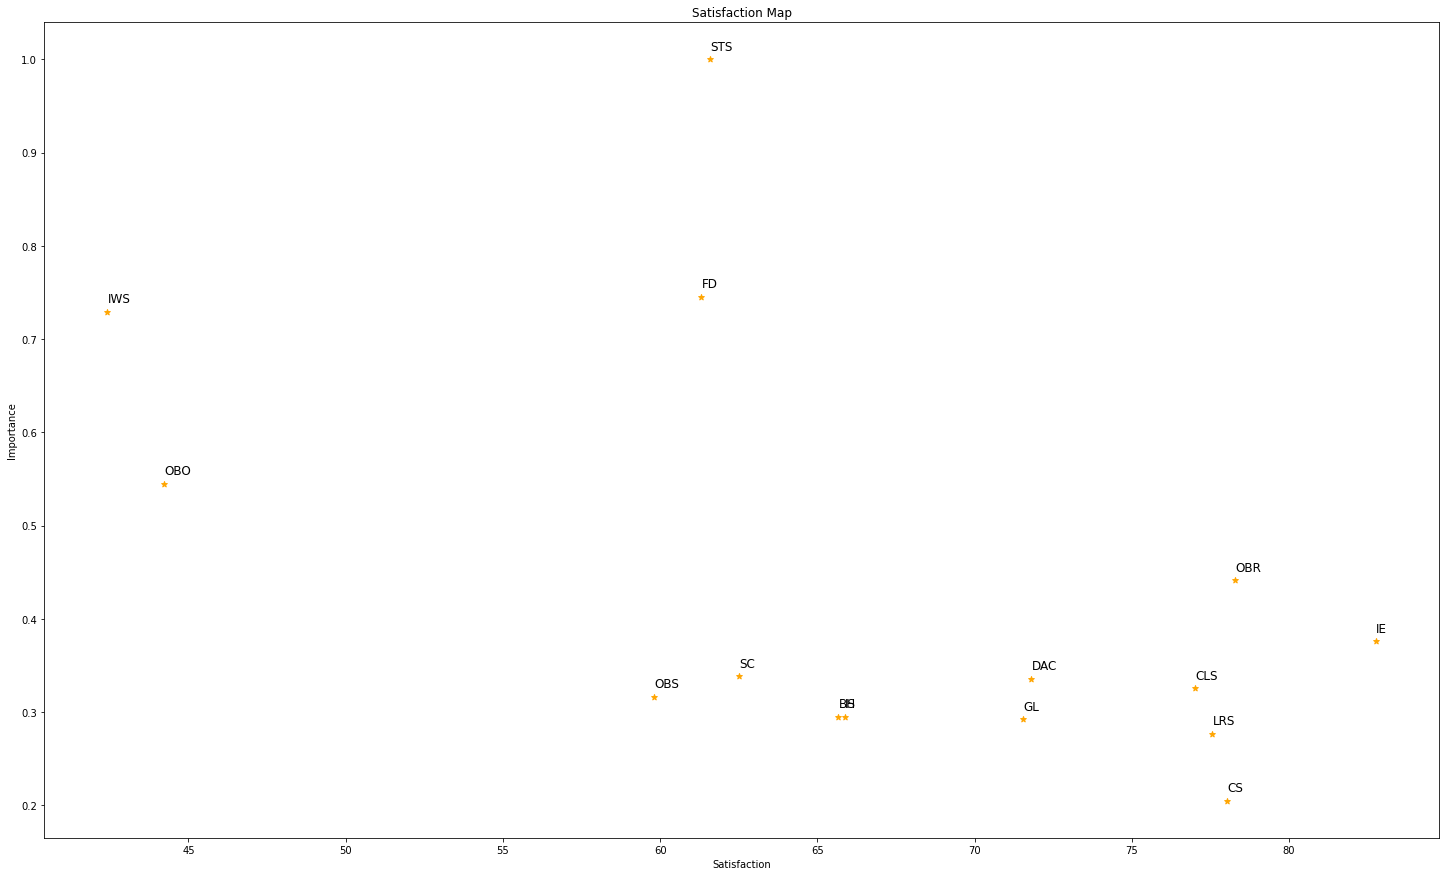

In [519]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))
types = target_columns_abv
x_coords = df_final["Satisfaction"]
y_coords = df_final["Importance"]
plt.title("Satisfaction Map")
plt.xlabel("Satisfaction")
plt.ylabel("Importance")
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker="*", color="orange")
    plt.text(x+0.01, y+0.01, type, fontsize=12)
plt.show()

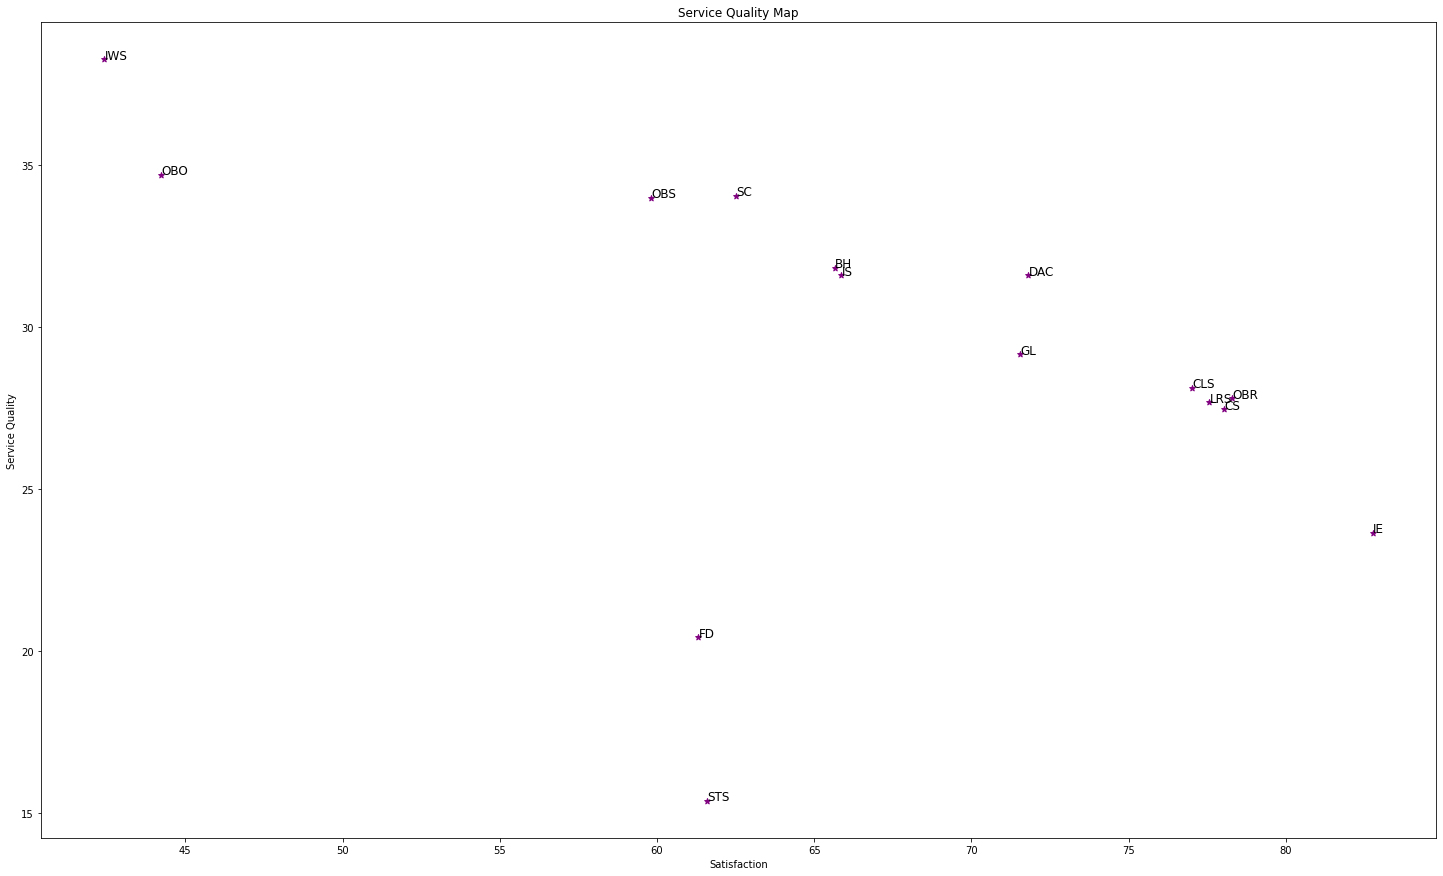

In [523]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))
types = target_columns_abv
x_coords = df_final["Satisfaction"]
y_coords = df_final["Service Quality"]
plt.title("Service Quality Map")
plt.xlabel("Satisfaction")
plt.ylabel("Service Quality")
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker="*", color="purple")
    plt.text(x+0.01, y+0.01, type, fontsize=12)
plt.show()